In [2]:
import os
import shutil
import random
from glob import glob
import matplotlib.pyplot as plt

In [3]:
def create_directory(path):
    if not os.path.exists(path):
        os.makedirs(path)

# Specify the folders for train and validation
source_folders = [f'folder_{i}' for i in range(1, 4)]
subfolders = ['CC', 'MC', 'EC', 'HGSC', 'LGSC']
dest_root = '../data/UBC_tile_1024_25k'

# Create the destination subfolders within train and validation
for folder in ['train', 'validation']:
    for subfolder in subfolders:
        create_directory(os.path.join(dest_root, folder, subfolder))

# Function to distribute images based on WSI identifiers
def distribute_images(source_folders, dest_root, train_ratio=0.85):
    for subfolder in subfolders:
        wsi_to_images = {}
        for source_folder in source_folders:
            source_path = os.path.join(source_folder, subfolder)
            images = glob(os.path.join(source_path, '*.png'))
            for image in images:
                # Extract WSI identifier from the filename
                wsi_id = os.path.basename(image).split('_')[1]
                if wsi_id not in wsi_to_images:
                    wsi_to_images[wsi_id] = []
                wsi_to_images[wsi_id].append(image)

        # Split WSI identifiers into train and validation sets for each subfolder
        all_wsi_ids = list(wsi_to_images.keys())
        random.shuffle(all_wsi_ids)
        split_idx = int(train_ratio * len(all_wsi_ids))
        train_wsi_ids = set(all_wsi_ids[:split_idx])
        validation_wsi_ids = set(all_wsi_ids[split_idx:])

        # Copy images to their respective train/validation subfolders
        for wsi_id, images in wsi_to_images.items():
            dest_type = 'train' if wsi_id in train_wsi_ids else 'validation'
            for image in images:
                dest_path = os.path.join(dest_root, dest_type, subfolder)
                shutil.copy(image, dest_path)

# Distribute images to train and validation folders
distribute_images(source_folders, dest_root)

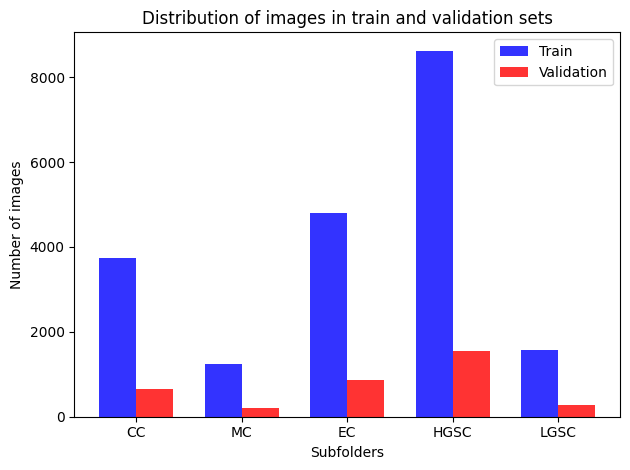

In [5]:
def plot_distribution(dest_root, subfolders):
    train_counts = []
    validation_counts = []

    for subfolder in subfolders:
        train_path = os.path.join(dest_root, 'train', subfolder)
        validation_path = os.path.join(dest_root, 'validation', subfolder)
        train_counts.append(len(glob(os.path.join(train_path, '*'))))
        validation_counts.append(len(glob(os.path.join(validation_path, '*'))))

    # Plotting the distribution
    fig, ax = plt.subplots()
    index = range(len(subfolders))
    bar_width = 0.35
    opacity = 0.8

    rects1 = ax.bar(index, train_counts, bar_width, alpha=opacity, color='b', label='Train')
    rects2 = ax.bar([i + bar_width for i in index], validation_counts, bar_width, alpha=opacity, color='r', label='Validation')

    ax.set_xlabel('Subfolders')
    ax.set_ylabel('Number of images')
    ax.set_title('Distribution of images in train and validation sets')
    ax.set_xticks([i + bar_width / 2 for i in index])
    ax.set_xticklabels(subfolders)
    ax.legend()

    plt.tight_layout()
    plt.show()

# Call the function to plot the distribution
plot_distribution('../data/UBC_tile_1024_25k', ['CC', 'MC', 'EC', 'HGSC', 'LGSC'])

In [6]:
def count_files_in_directory(directory):
    file_count = 0
    for root, dirs, files in os.walk(directory):
        file_count += len([file for file in files if os.path.isfile(os.path.join(root, file))])
    return file_count

directory_path = '../data/UBC_tile_1024_25k'
total_files = count_files_in_directory(directory_path)
print(f"Total number of files in {directory_path}: {total_files}")

Total number of files in ../data/UBC_tile_1024_25k: 23525
